In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def present_value(x, n, rate):
    return x/(1+rate)**n

In [46]:
# Coupon bond
principle = 1000
coupon = 0.1
maturity = 3
market_interest_rate = 0.04

For zero coupon bonds, we simply discount the future cashflow i.e. the principle at maturity to find the present day value of the bond.
Money today is worth more than money tomorrow, so the present value is lower than the principle.

In [47]:
present_value(principle,maturity,market_interest_rate)

888.9963586709148

Present value of a coupon bond

$$\frac{x}{(1+r)^T} + \Sigma_n^T \frac{c}{(1+r)^n}$$

In [48]:
price = 0
for t in range(1,maturity+1):
    price += present_value(principle * coupon,t,market_interest_rate) # discounted future cashflows
price += present_value(principle,maturity,market_interest_rate)
price

1166.5054619936275

# Using Vasicek Model

The Vasicek model assumes interest rates follow an Ortstein-Uhlenbeck process.

We can use Monte-Carlo simulations of the interest rate to estimate the value of a Bond.

In [165]:
T=1
kappa = 0.3
theta = 0.02
r0 = 0.13
sigma = 0.03
n_samples = 100


In [166]:
def vasicek(kappa, theta, r0, sigma, T=1, n_samples = 1000):
    """Implement the Vasicek model for stochastic mean reverting interest rates.

    Args:
        kappa: Speed of mean reversion
        theta: Mean interest rate
        r0: Initial rate
        sigma: volatility of rate
        T: Time to maturity
        n_samples: Number of samples to take within duration

    Returns: Time series of rate samples.
    """
    r = np.zeros(n_samples)
    dt = T/n_samples
    r[0] = r0
    for t in range(1,n_samples):
        dx = kappa*(theta-r[t-1])*dt + sigma*np.random.normal(0, np.sqrt(dt))
        r[t] = r[t-1] + dx
    return r

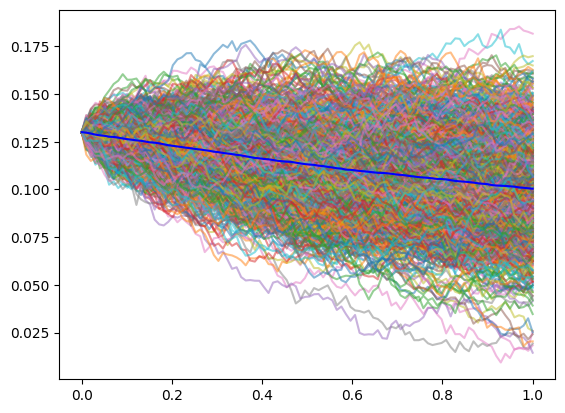

In [167]:
ts = np.linspace(0,T, n_samples)
rs = []
for _ in range(1001):
    r = vasicek(kappa,theta,r0,sigma,n_samples=n_samples)
    plt.plot(ts, r, alpha=0.5)
    rs.append(r)
mean_r = np.array(rs).mean(axis=0)
plt.plot(ts, mean_r, "b")

In [170]:
integral_r = np.array(rs).sum(axis=1)*(T/n_samples)

In [171]:
principle = 1000

present_integral = np.exp(-integral_r)
bond_price = 1000*np.mean(present_integral)
bond_price

892.4174038378169